100% de Vterm > 11.6836 m/s :
 90% de Vterm > 10.5153 m/s :
            t > 23.526 sec



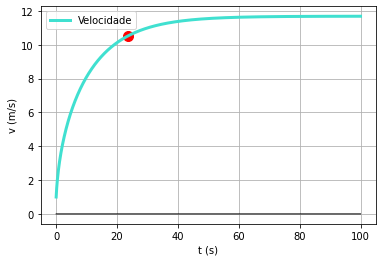

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Gravidade
g = 9.8

# Massa
m = 75

# Tempo inicial e final
ti = 0
tf = 100

# Area, ró, u, Cres e Potencia
A = 0.3
Ro = 1.225
u = 0.004
Cres = 0.9
P = 0.4 * 745.699872

# Posição inicial
xx0 = 0
xy0 = 0

# Velocidade inicial
v0 = 1
vx0 = v0

# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0


# Preencher os vetores x, v, a
for i in range(n):    
    ax[i] = -(u * g) - (Cres * A * Ro * vx[i] * vx[i] / (2 * m)) + P / (m * vx[i])
    xx[i + 1] = xx[i] + vx[i] * dt
    vx[i + 1] = vx[i] + ax[i] * dt


print("100% de Vterm >", np.round(vx[-1], 4), "m/s :")

        
# Encontrar o tempo a que a velocidade é 90% da terminal
novVTerm = vx[-1] * 0.9
for i in range(n):
    if (novVTerm -dt <= vx[i]):
        print(" 90% de Vterm >", np.round(novVTerm, 4), "m/s :")
        print("            t >", t[i], "sec")
        print("")
        plt.plot(t[i], vx[i], "o", markersize="10", linewidth=5, color="red")
        break
        

# Plot
plt.plot(t, vx, label="Velocidade", linestyle='-', linewidth=3, color="turquoise")
plt.plot(t, t * 0, linestyle='-', linewidth=1, color="black")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()